<a href="https://colab.research.google.com/github/annaluizacaraciolo/DeepLearning2023/blob/main/ListaPraticaMLPConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>
Autores:<br>
- Amanda Alves (aag) <br>
- Anna Luiza Caraciolo (alcaf)
</strong>

**LISTA PRÁTICA DAS UNIDADES 1 E 2**

Pode ser feita com o grupo do projeto. Recomendo pair/group programming para que todos vejam um pouco de todas as partes.


Treine e avalie 4 modelos de classificação para a base de dados de "handwritten digits" do MNIST https://en.wikipedia.org/wiki/MNIST_database.



1.   Um modelo base que não seja uma rede neural, como _decision tree, xgboost, random forest_, etc. Recomendação: use o sklearn (https://scikit-learn.org/).

2.   Uma MLP

3. Uma rede convolucional criada por ti. Recomendação: https://pytorch.org/

4. Use um modelo pre treinado já consolidado na literatura para fazer _transfer learning_. Recomendações: https://pytorch.org/hub/pytorch_vision_vgg/


Compare os resultados dos modelos:
* plote gráficos que mostrem as acurácias de cada modelo
* indique para cada modelo qual foi o digito mais dificil de classificar (indique qual métrica usou para concluir isso)
* argumente qual o melhor modelo levando em consideração o tempo de execução e acurácia.

Recomendação use:
https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html .



# Imports e Downloads

In [1]:
!pip install torch -q
!pip install torchvision -q

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 248995120.46it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 132533581.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 63949581.09it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22177565.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



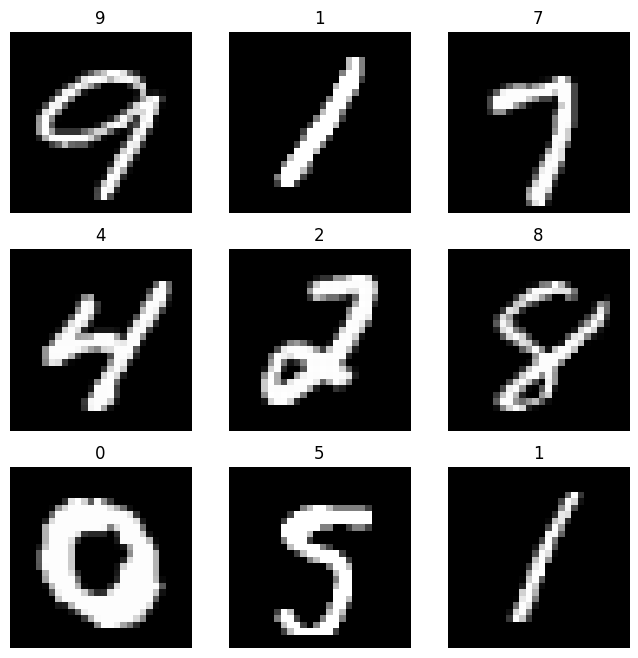

In [5]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = 64,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = 64,
                                      shuffle = False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


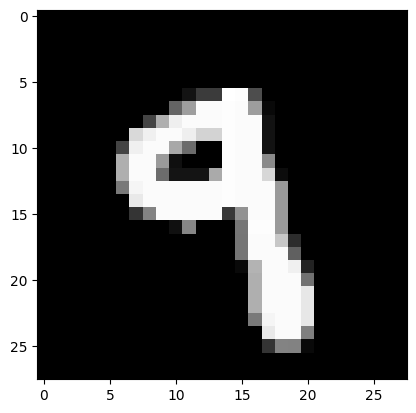

Label: 9


In [7]:
# Display image and label.
train_features, train_labels = next(iter(train_gen))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Modelo base

In [9]:
from sklearn.ensemble import RandomForestClassifier

nsamples, nx, ny, nrgb = train_features.shape
x_train = train_features.reshape((nsamples, nx*ny*nrgb))

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, train_labels)

RandomForestClassifier(max_depth=10, random_state=0)

In [10]:
test_features, test_labels = next(iter(test_gen))
nsampes_test, nx_test, ny_test, nrgb_test = test_features.shape
x_test = test_features.reshape((nsampes_test, nx_test*ny_test*nrgb_test))
y_pred = clf.predict(x_test)

In [11]:
y_pred

array([9, 3, 1, 0, 4, 1, 4, 9, 4, 9, 0, 0, 9, 0, 1, 3, 4, 9, 3, 4, 9, 4,
       4, 4, 4, 0, 9, 4, 0, 1, 3, 1, 3, 0, 9, 2, 9, 1, 3, 1, 1, 9, 4, 1,
       3, 3, 3, 9, 4, 4, 6, 3, 9, 3, 1, 0, 4, 1, 4, 1, 3, 8, 9, 3])

### Scores

In [12]:
accuracy_score(y_pred, test_labels)

0.59375

In [13]:
print(classification_report(y_pred, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.90      0.75      0.82        12
           2       0.20      1.00      0.33         1
           3       1.00      0.46      0.63        13
           4       0.90      0.60      0.72        15
           5       0.00      0.00      0.00         0
           6       0.20      1.00      0.33         1
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       0.71      0.38      0.50        13

    accuracy                           0.59        64
   macro avg       0.59      0.59      0.52        64
weighted avg       0.87      0.59      0.69        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred)

conf_matrix

array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 9, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 9, 0, 0, 0, 0, 0],
       [0, 1, 0, 3, 2, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 2, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 6],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 5]])

# MLP

In [15]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, train_labels)

In [20]:
predictions = clf_mlp.predict(x_test)
predictions

array([7, 3, 1, 0, 4, 1, 4, 9, 1, 4, 0, 4, 9, 0, 1, 3, 9, 3, 3, 9, 9, 6,
       4, 8, 4, 0, 9, 4, 0, 1, 3, 1, 3, 0, 9, 2, 2, 1, 2, 1, 1, 9, 4, 1,
       3, 5, 3, 2, 4, 4, 6, 3, 4, 3, 2, 8, 4, 1, 9, 4, 9, 8, 9, 3])

Visualizando algumas da predictions

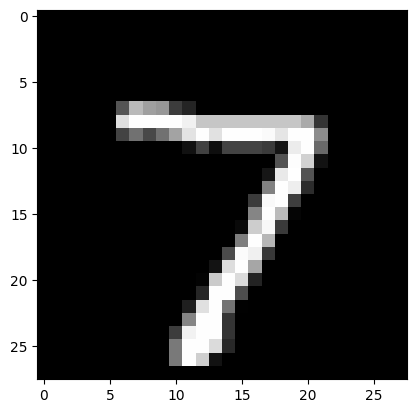

Prediction: 7


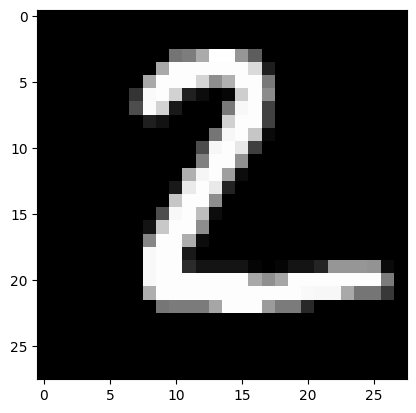

Prediction: 3


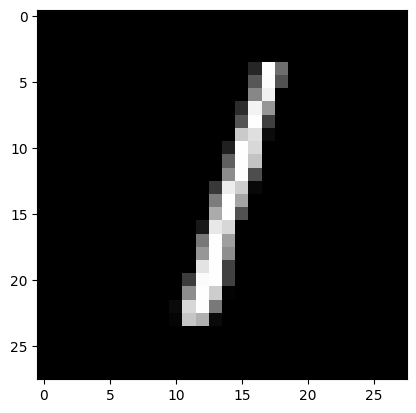

Prediction: 1


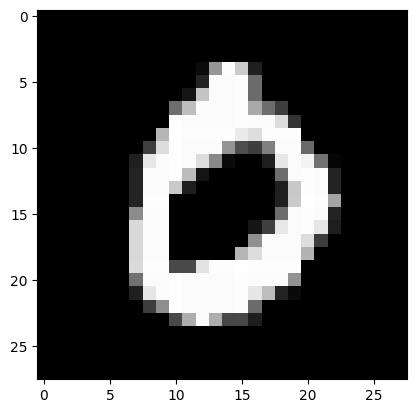

Prediction: 0


In [17]:
for i in range(len(predictions)):
  img = test_features[i].squeeze()
  label = predictions[i]
  plt.imshow(img, cmap="gray")
  plt.show()
  print(f"Prediction: {label}")

  if i == 3: break

In [21]:
clf_mlp.score(x_test, test_labels)

0.65625

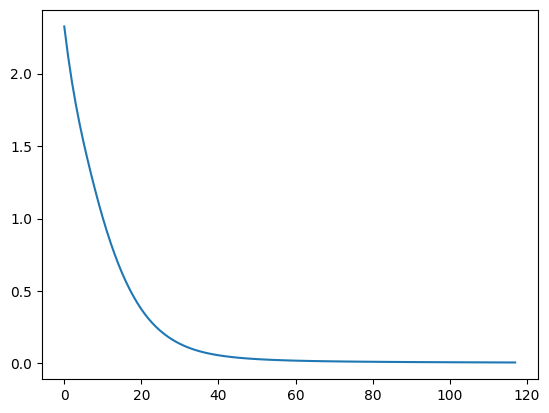

In [25]:
loss_values = clf_mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [22]:
print(classification_report(predictions, test_labels))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.90      0.82      0.86        11
           2       0.60      0.60      0.60         5
           3       1.00      0.55      0.71        11
           4       0.80      0.62      0.70        13
           5       0.14      1.00      0.25         1
           6       0.40      1.00      0.57         2
           7       0.14      1.00      0.25         1
           8       1.00      0.33      0.50         3
           9       0.86      0.55      0.67        11

    accuracy                           0.66        64
   macro avg       0.67      0.73      0.59        64
weighted avg       0.83      0.66      0.70        64



# Rede Convolucional

In [27]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 64 # the size of input data took for one iteration
lr = 1e-3 # size of step

In [28]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [29]:
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [ ]:
print(torch.__version__, torch.cuda.is_available())

2.0.1+cu118 True


In [30]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

### Training

**Colocar ambiente de GPU para fazer funcionar**

In [32]:
for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [100/937], Loss: 0.3866
Epoch [1/20], Step [200/937], Loss: 0.1992
Epoch [1/20], Step [300/937], Loss: 0.3025
Epoch [1/20], Step [400/937], Loss: 0.3346
Epoch [1/20], Step [500/937], Loss: 0.2813
Epoch [1/20], Step [600/937], Loss: 0.0854
Epoch [1/20], Step [700/937], Loss: 0.0904
Epoch [1/20], Step [800/937], Loss: 0.0520
Epoch [1/20], Step [900/937], Loss: 0.0767
Epoch [2/20], Step [100/937], Loss: 0.0576
Epoch [2/20], Step [200/937], Loss: 0.0324
Epoch [2/20], Step [300/937], Loss: 0.1171
Epoch [2/20], Step [400/937], Loss: 0.2298
Epoch [2/20], Step [500/937], Loss: 0.1172
Epoch [2/20], Step [600/937], Loss: 0.1863
Epoch [2/20], Step [700/937], Loss: 0.1854
Epoch [2/20], Step [800/937], Loss: 0.0804
Epoch [2/20], Step [900/937], Loss: 0.0776
Epoch [3/20], Step [100/937], Loss: 0.1189
Epoch [3/20], Step [200/937], Loss: 0.1553
Epoch [3/20], Step [300/937], Loss: 0.0566
Epoch [3/20], Step [400/937], Loss: 0.0850
Epoch [3/20], Step [500/937], Loss: 0.0381
Epoch [3/20

Salvando a rede

In [ ]:
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

Para resolver eventuais problemas de ter CPU e GPU executando informações

In [ ]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
#net.to(device)

### Testing

In [33]:
correct = 0
total = 0
accuracies_test_cnn = []

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(test_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)

     # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    accuracy_test = correct / total
    accuracies_test_cnn.append(accuracy_test)

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 98 %


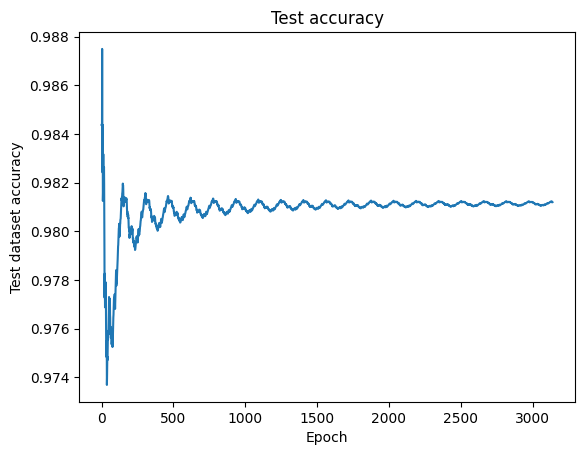

In [38]:
plt.figure()
plt.plot(accuracies_test_cnn)
plt.xlabel('Epoch')
plt.ylabel('Test dataset accuracy')
plt.title('Test accuracy')
plt.show()

# Rede Convolucional consolidada

Novo código

In [ ]:
class VGG11(nn.Module):
    def __init__(self, in_channels, num_classes=1000):
        super(VGG11, self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        # convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(self.in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # fully connected linear layers
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096, out_features=self.num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        # flatten to prepare for the fully connected layers
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

matplotlib.style.use('ggplot')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")
epochs = 10
batch_size = 32

# our transforms will differ a bit from the VGG paper
# as we are using the MNIST dataset, so, we will directly resize...
# ... the images to 224x224 and not crop them and we will not use...
# ... any random flippings also
train_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5), std=(0.5))])
valid_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5), std=(0.5))])

# training dataset and data loader
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                             download=True,
                                             transform=train_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True)
# validation dataset and dataloader
valid_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True,
                                           transform=valid_transform)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset,
                                             batch_size=batch_size,
                                             shuffle=False)

# instantiate the model
model = VGG11(in_channels=1, num_classes=10).to(device)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,
                      weight_decay=0.0005)

# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1

        image, labels = data
        image = image.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        loss.backward()
        optimizer.step()

    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

# validation
def validate(model, testloader, criterion):
    model.eval()

    # we need two lists to keep track of class-wise accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1

            image, labels = data
            image = image.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(image)
            # calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

            # calculate the accuracy for each class
            correct  = (preds == labels).squeeze()
            for i in range(len(preds)):
                label = labels[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1

    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))

    # print the accuracy for each class after evey epoch
    # the values should increase as the training goes on
    print('\n')
    for i in range(10):
        print(f"Accuracy of digit {i}: {100*class_correct[i]/class_total[i]}")

    return epoch_loss, epoch_acc

# start the training
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")

    train_epoch_loss, train_epoch_acc = train(model, train_dataloader,
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_dataloader,
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)

    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")

    print('-'*50)

# save the trained model to disk
torch.save({
            'epoch': epochs,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, '../outputs/model.pth')

# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-',
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-',
    label='validataion accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../outputs/accuracy.jpg')
plt.show()
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-',
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-',
    label='validataion loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../outputs/loss.jpg')
plt.show()

print('TRAINING COMPLETE')

Código anterior

In [ ]:
class VGG(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(7 * 7 * 128, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = VGG(num_classes=10)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
total_correct = 0
total_samples = 0
accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_gen:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    accuracy_train = total_correct / total_samples
    accuracies.append(accuracy_train)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss/len(train_gen):.4f}')




Epoch 1/10, Loss: 0.1542
Epoch 2/10, Loss: 0.0498
Epoch 3/10, Loss: 0.0363
Epoch 4/10, Loss: 0.0266
Epoch 5/10, Loss: 0.0243
Epoch 6/10, Loss: 0.0195
Epoch 7/10, Loss: 0.0169
Epoch 8/10, Loss: 0.0153
Epoch 9/10, Loss: 0.0127
Epoch 10/10, Loss: 0.0112


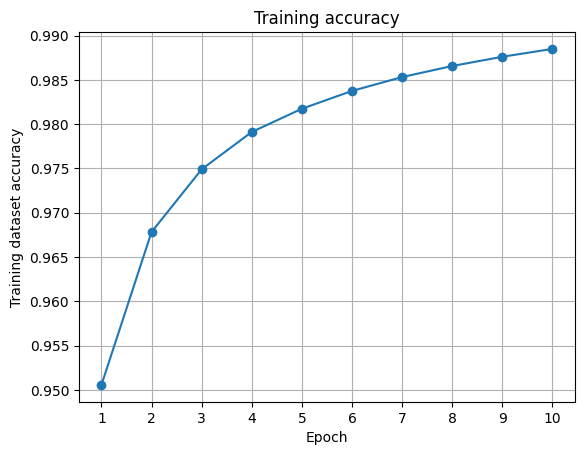

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs + 1), accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training dataset accuracy')
plt.title('Training accuracy')
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))
plt.show()

In [ ]:
model.eval()

total_correct = 0
total_samples = len(test_data)

with torch.no_grad():
    for inputs, labels in test_gen:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()

accuracy = total_correct / total_samples
print(f'Acurácia no conjunto de validação: {accuracy:.4f}')


Acurácia no conjunto de validação: 0.9927


# Comparação

O modelo de random forest consegue atingir boa performance em tarefas de classificação de uma forma geral (se comparado a modelos mais simples como Naive Bayes, Knn ou decision tree, por exemplo). Entretanto, obtivemos a melhor acurácia de 0.63 na tarefa de classificação de imagens do conjunto MNIST.


Ao definirmos a nossa primeira rede neural, o MLP, já foi possível obter um bom aumento na acurácia para 0.70.


Já ao utilizarmos CNN mais complexas, observamos um aumento considerável na acurácia dos modelos definidos, conseguindo atingir uma acurácia de até 0.99 para o conjunto em análise.


In [ ]:
accuracies = np.array([0.63, 0.70, 0.98, 0.99])
labels = ["Random forest", "MLP", "CNN", "Consolidada"]

In [ ]:
testing_df = pd.DataFrame( {
    "Acurácia": [0.63, 0.70, 0.98, 0.99]
  }, index=["Random forest", "MLP", "CNN", "Consolidada"]
)
testing_df

,Acurácia
Random forest,0.63
MLP,0.70
CNN,0.98
Consolidada,0.99


<Axes: ylabel='Acurácia'>

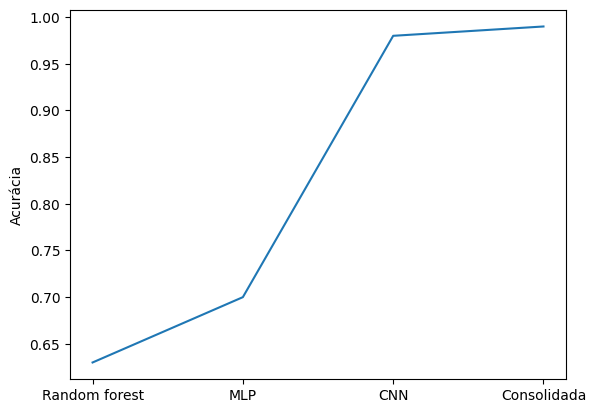

In [ ]:
sns.lineplot(data=testing_df, x=labels, y='Acurácia')